In [1]:
import wave
import sys
filename = 'contest_9_size_a.wav'
wf = wave.open(filename)
samplewidth = wf.getsampwidth()
nchannels = wf.getnchannels()
rate = wf.getframerate()
print ("sample width = ",samplewidth)
print ("frame rates = ", rate)
print ("channels = ", nchannels)
frames = bytearray(wf.readframes(wf.getnframes()))
length = len(frames)

sample width =  1
frame rates =  192000
channels =  1


In [86]:
print(length)

227588158


In [2]:
import numpy as np
import pandas as pd
import struct
from matplotlib import pyplot as plt
start = 9750001
length = 3000
fb = frames[start:start+length]
# a = -np.array(struct.unpack('h'*int((length)/2), frames[start:start+length]))[1::2]
a = np.array(struct.unpack('B'*int(len(fb)), fb))
# p = find_peaks(abs(a), height=3000)[0]
# df = pd.Series(p).diff()

In [8]:
a = np.array(struct.unpack('B'*int(len(frames)), frames))

In [ ]:
pd.Series(a).rolling(20).std().plot()

In [70]:
from scipy.signal import find_peaks
peak = find_peaks(a, height=200, distance=20)[0]
plt.figure(figsize=(20,4))
plt.plot(a)`
plt.plot(peak, a[peak], '.')

3000

In [69]:
''.join(['0' if a[p+40] < 100 else '1' for p in peak])

'001111101011000000101001'

In [71]:
import pandas as pd
pd.Series(peak).diff()

0       NaN
1      88.0
2     139.0
3     164.0
4     180.0
5     164.0
6     166.0
7     136.0
8     128.0
9     133.0
10    125.0
11    186.0
12    124.0
13     91.0
14     90.0
15     90.0
16     90.0
17     88.0
18    140.0
19    123.0
20    136.0
21    130.0
22     90.0
23    136.0
dtype: float64

In [83]:
from collections import Counter
Counter([int(a[p+45]/100) for p in peak])

Counter({0: 13, 1: 11})

In [203]:
len(find_peaks(a, height=1000)[0])+len(find_peaks(-a, height=1000)[0]),len(find_peaks(abs(a),height=1000)[0])

(3885742, 3884839)

1     7.0
3     4.0
5     7.0
7     7.0
9     4.0
11    3.0
13    7.0
15    3.0
17    4.0
19    7.0
21    4.0
23    7.0
25    3.0
27    4.0
29    4.0
31    7.0
33    4.0
35    7.0
37    3.0
39    4.0
41    4.0
43    4.0
dtype: float64

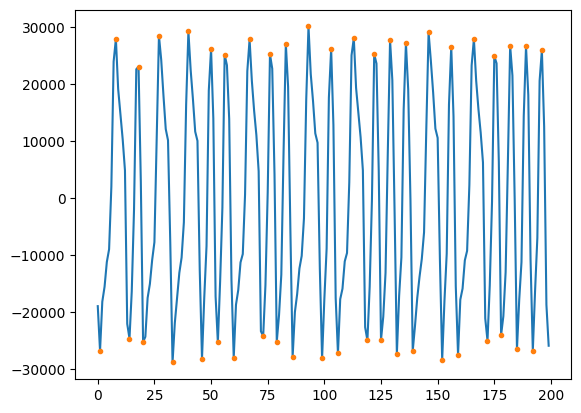

In [215]:
start = 500000
b = a[start:start+200]
b1 = abs(b)
p0 = find_peaks(b1, height=1000)[0]
plt.plot(b)
plt.plot(p0, b[p0], '.')
df = pd.Series(p0).diff()
# [list(df[0::2]), list(df[1::2])]
# lists_of_lists = [list(df[0::2]), list(df[1::2])]
# [sum(x) for x in zip(*lists_of_lists)]
df[1::2]

In [164]:
p0 = find_peaks(-a, height=1000)[0]

In [172]:
pd.Series(p0).diff(), pd.Series(p).diff()

(0           NaN
 1           7.0
 2           7.0
 3           7.0
 4           6.0
            ... 
 1942683     7.0
 1942684    10.0
 1942685    10.0
 1942686     6.0
 1942687    10.0
 Length: 1942688, dtype: float64,
 0           NaN
 1           7.0
 2           7.0
 3           7.0
 4           6.0
            ... 
 1943049     7.0
 1943050     7.0
 1943051    13.0
 1943052     7.0
 1943053     6.0
 Length: 1943054, dtype: float64)

In [154]:
p = find_peaks(a, height=1000)[0]
df = pd.Series(p).diff()
tap = ''
pos = []
for ix, x in enumerate(df[10:]):
    if x < 5 or x > 20:
        continue
    elif x < 10:
        tap += '0'
    else:
        tap += '1'
    pos.append(p[ix])
print(tap[tap.index('1')-10:])

0000000000111111111111111111111111111111111111111100000000000000000000000000000000000000001100000010101000110101010101101001110101000011101010100101001001101001111101001110100100000101000111101010010101000001101010000101001000100000000100000000100000000100111000100010110101001110101111100100000000100000000100000000100100000111100101100100001100010100100010100100100010110010101100000010111001101100100111100000000100101010101111101100111001100100010110101010100010011111001101100101010100000000111001101110111001100111001100100001100101000100101000100100010110010101100000010100100010100101001100000100100111110111000011100110010101100010100010100100100001111011110100010011100100010101100011100010100111100001111001101111000011100010101100101010101111101100111001110101111101110111100100011101111100111111110110011001100100000111111000100111110111001101100110010101100010100010100100100001100100011100001000100100010101100011100010100111000011101100010100010100111100101100010001101100101100010100

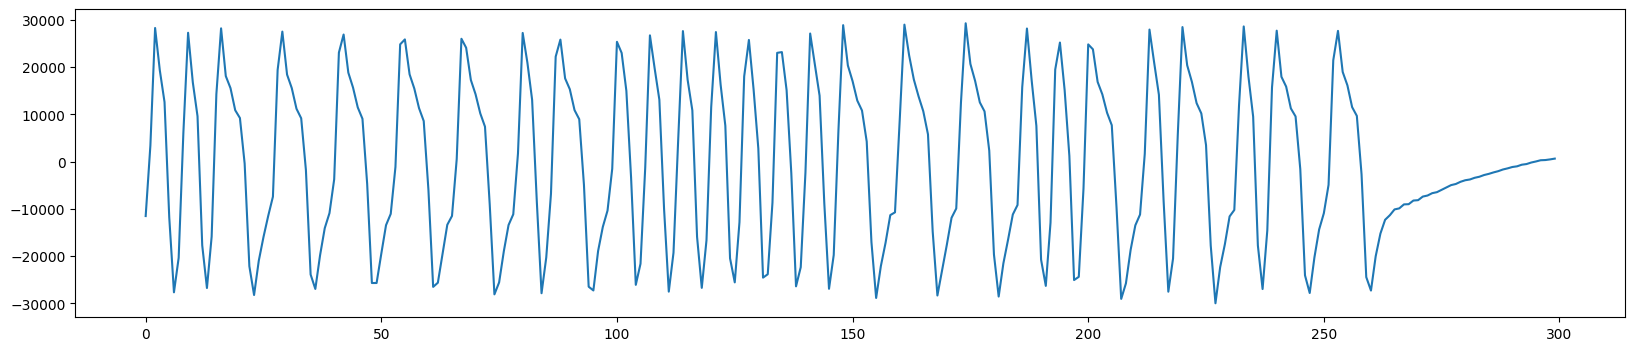

In [163]:
x=pos[86574+tap.index('1')-10]
plt.figure(figsize=(20,4))
plt.plot(a[x-100:x+200])

In [152]:
open('contest9_side_a.tap','w').write(tap[tap.index('1')-10:])

1918880

In [144]:
def cntbit(x):
    LOOKUP = \
    [
        0, 1, 1, 2, 1, 2, 2, 3, 
        1, 2, 2, 3, 2, 3, 3, 4
    ]
    return LOOKUP[(x>>4)&0xf] + LOOKUP[x&0xf]

In [148]:
tag = tap.index('1'*40+'0'*40+'11')+82
header = tap[tag:tag+1270-82]
size = 9
cnt = 0
data = []
for ix, b in enumerate([header[i:i+size] for i in range(0, len(header), size)]):
    if b[-1] == '1':
        c = int(b[:8], 2)
        if ix < 128:
            # print(ix)
            cnt += cntbit(c)                       
        data.append(c)
    else:
        print()
        print(ix, binstr)
data

NameError: name 'binstr' is not defined

In [147]:
len(data)

131

In [110]:
df[df>14]

23252        51.0
23274        24.0
23277       612.0
23278      1760.0
23280       447.0
            ...  
1774174     899.0
1774175      48.0
1774181      21.0
1797370      64.0
1797392    2743.0
Length: 163, dtype: float64

In [97]:
p = find_peaks(a, height=1000)[0]
plt.figure(figsize=(20,4))
plt.plot(a)
# plt.plot(find_peaks(a, height=1000)[0],a[find_peaks(a)[0]], '^')
plt.plot(p,a[p], 'v')
import pandas as pd
tap = ''
for x in list(pd.Series(p).diff()[10:]):
    if x < 6 or x > 14:
        continue
    elif x < 10:
        tap += '0'
    else:
        tap += '1'
print(tap)

2498

'00000001110000001111100111111011101111001110110100001111110110111001101110101111101100111110010000111000111111011011110100001111110000110101000110000000110000000100000000110111000110011110101101111101111100110000000110000000110000000110010000111110111100110001100011100'

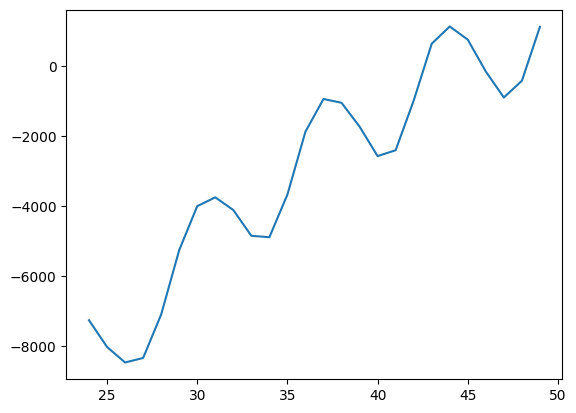

In [36]:
import pandas as pd
plt.plot(pd.Series(a).rolling(25).mean())

In [5]:
from scipy.signal import find_peaks

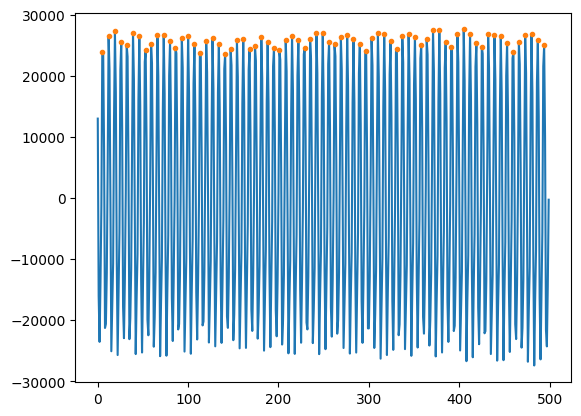

In [26]:
plt.plot(a)


In [ ]:
find_peaks(a)[0